
<h1><font face = "Georgia" size = "5">Using Artist Layer in Matplotlib to generate subplots Visualizing the Washington Post police shooting data</font></h1>

<a href="https://github.com/washingtonpost/data-police-shootings">Data on Github</a>

<h2><font face = "Georgia" size = "5" color = "red">Using Artist Layer in Matplotlib to generate subplots</font> </h2>
<img src="https://matplotlib.org/1.4.2/mpl_examples/api/logo2.hires.png" alt="image">


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [5]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,-111.841,33.328,True
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,-97.564,38.704,True
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,-91.119,40.809,True
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,-79.991,40.413,True


In [6]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 17 columns):
id                         6032 non-null int64
name                       5802 non-null object
date                       6032 non-null object
manner_of_death            6032 non-null object
armed                      5822 non-null object
age                        5756 non-null float64
gender                     6031 non-null object
race                       5410 non-null object
city                       6032 non-null object
state                      6032 non-null object
signs_of_mental_illness    6032 non-null bool
threat_level               6032 non-null object
flee                       5688 non-null object
body_camera                6032 non-null bool
longitude                  5738 non-null float64
latitude                   5738 non-null float64
is_geocoding_exact         6032 non-null bool
dtypes: bool(3), float64(3), int64(1), object(10)
memory usage: 677.5+ KB


<h1>Visualization Strategy</h1>
<p>Looking at the data, there are more descriptive features than discrete values.</p>
<ol>groupby df['state']</ol>
<ol>sum based on race per state</ol>
<ol>bar chart comparing all states</ol>



In [9]:
df1_grouped = df.groupby(['state','race'],as_index=False).count()
df1_grouped

,state,race,id,name,date,manner_of_death,armed,age,gender,city,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,AK,A,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
1,AK,B,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3
2,AK,N,9,9,9,9,9,9,9,9,9,9,9,9,8,8,9
3,AK,W,24,24,24,24,24,24,24,24,24,24,22,24,20,20,24
4,AL,B,32,32,32,32,31,31,32,32,32,32,31,32,30,30,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,WV,B,8,8,8,8,8,7,8,8,8,8,8,8,7,7,8
198,WV,W,41,41,41,41,37,40,41,41,41,41,38,41,34,34,41
199,WY,H,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
200,WY,N,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [10]:
df1_grouped = df1_grouped[['id','race','state']]

df1_grouped

,id,race,state
0,2,A,AK
1,3,B,AK
2,9,N,AK
3,24,W,AK
4,32,B,AL
...,...,...,...
197,8,B,WV
198,41,W,WV
199,2,H,WY
200,2,N,WY


In [11]:
df1_grouped = df1_grouped.rename(columns={'id':'count'})
df1_grouped

,count,race,state
0,2,A,AK
1,3,B,AK
2,9,N,AK
3,24,W,AK
4,32,B,AL
...,...,...,...
197,8,B,WV
198,41,W,WV
199,2,H,WY
200,2,N,WY


<BarContainer object of 202 artists>

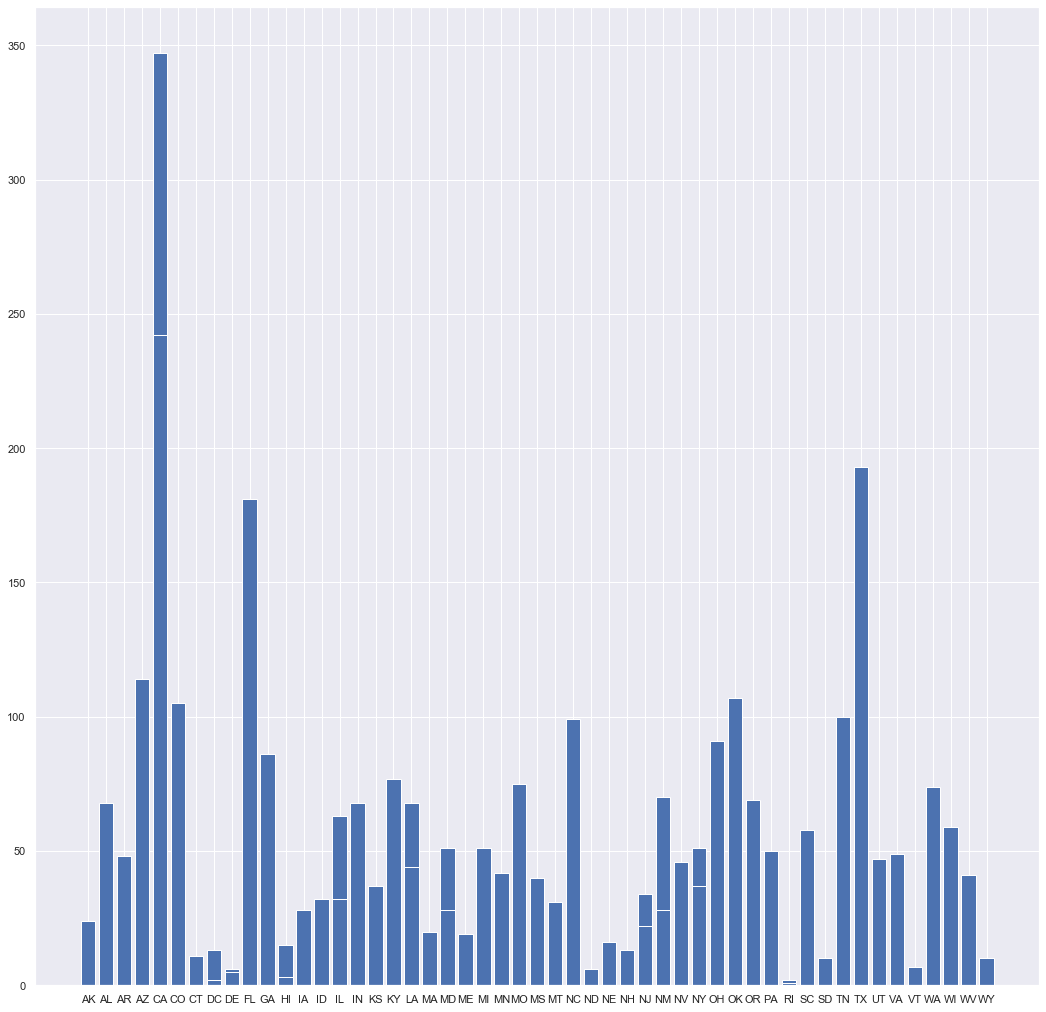

In [13]:
fig, ax = plt.subplots(figsize=(18,18))

ax.bar(df1_grouped['state'],df1_grouped['count'])

<BarContainer object of 202 artists>

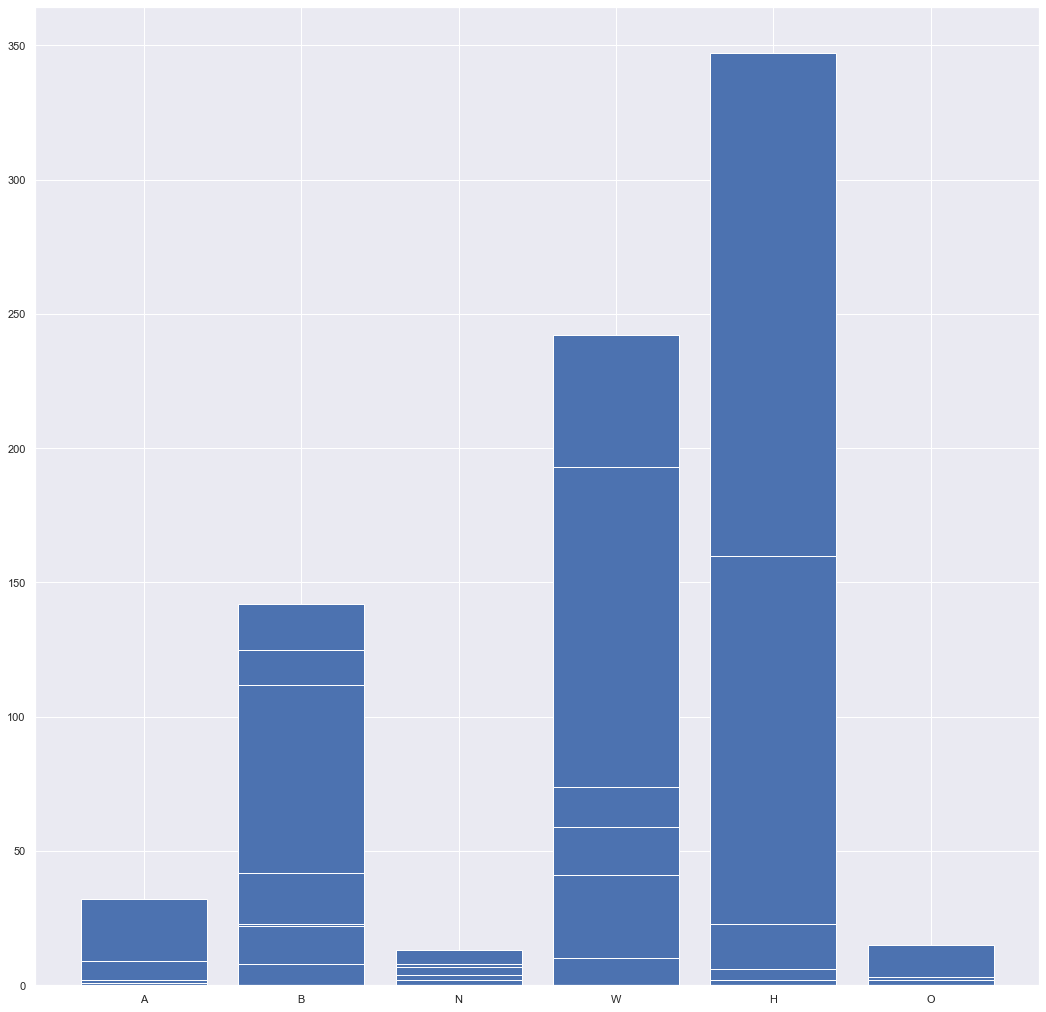

In [14]:
fig, ax = plt.subplots(figsize=(18,18))

ax.bar(df1_grouped['race'],df1_grouped['count'])

<p>In order to plot grouped bar charts in matplotlib, each racial category has its own axis.</p>
<ul>W</ul>
<ul>B</ul>
<ul>A</ul>
<ul>N</ul>
<ul>H</ul>
<ul>O</ul>
<ul>None</ul>


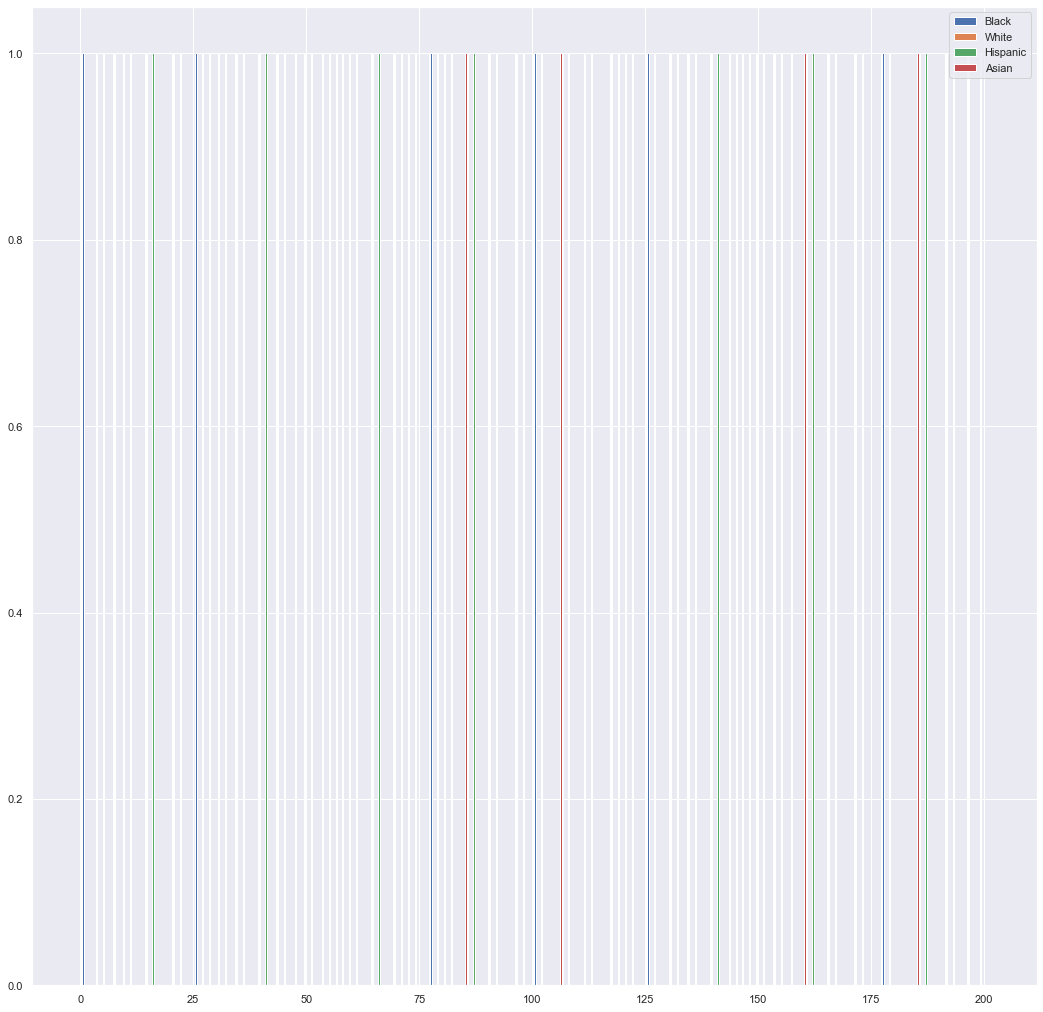

In [15]:
fig, ax = plt.subplots(figsize=(18,18))

states = df1_grouped['state']
u = np.arange(len(states))
width = 0.25

ax.bar(u-3*width/2,df1_grouped['race']== 'B',width, label = "Black")
ax.bar(u-width/2,df1_grouped['race']== 'w',width, label = "White")
ax.bar(u+width/2,df1_grouped['race']== 'H',width, label = "Hispanic")
ax.bar(u+3*width/2,df1_grouped['race']== 'A',width, label = "Asian")

ax.legend()


In [16]:
import seaborn as sns


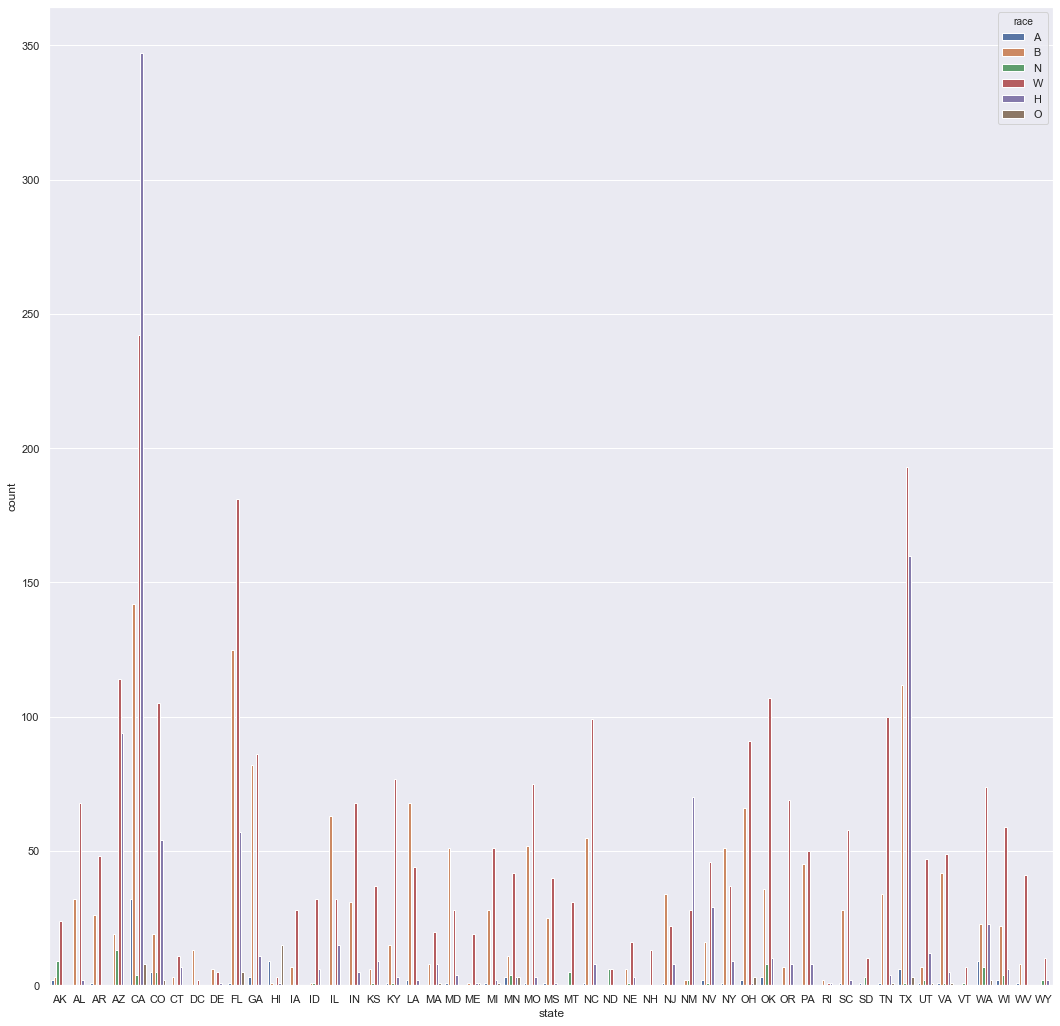

In [19]:
sns.set()
plt.figure(figsize=(18,18))

ax = sns.barplot(data=df1_grouped, x= 'state', y='count', hue='race')

<body><font face = "Georgia">
<h1><font face = "Georgia" size = "8" color = "red">What's going on in California?</font></h1>
<h2><font size ="5"> Let's take a closer look </font></h2>
<p><font size ="5">The bar chart generated will reflect the number of police shootings by race since 2015 using the Washington Post data.</font> </p>
</font></body>

In [21]:
df_ca = df1_grouped.loc[df1_grouped['state']=='CA']
df_ca

,count,race,state
14,32,A,CA
15,142,B,CA
16,347,H,CA
17,4,N,CA
18,8,O,CA
19,242,W,CA


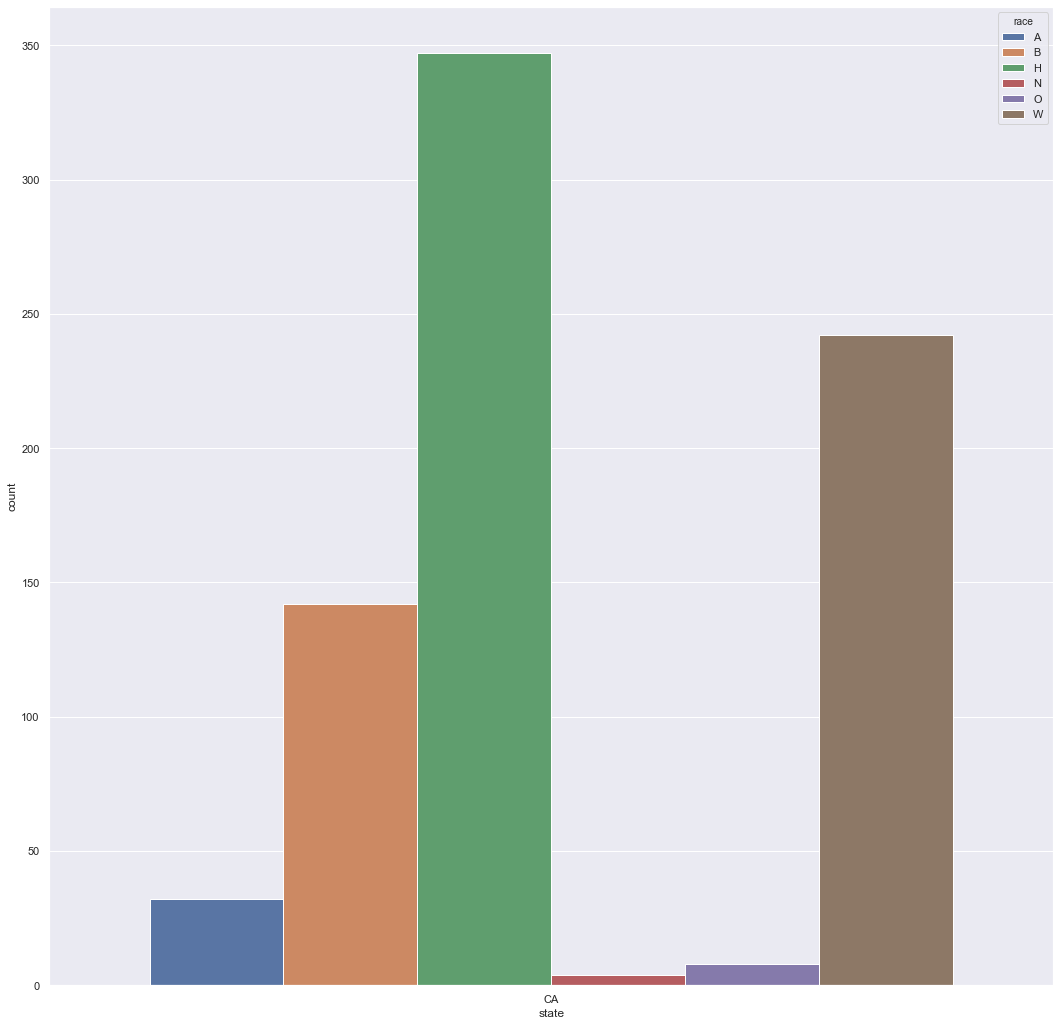

In [24]:
plt.figure(figsize=(18,18))

ax = sns.barplot(data=df_ca, x= 'state', y='count', hue='race')

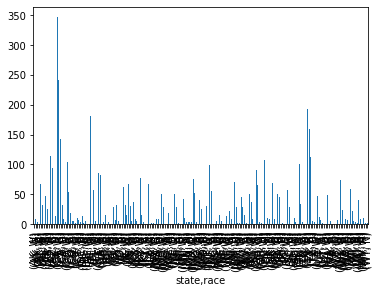

In [83]:
df2['race'].value_counts().plot(kind='bar')